<a href="https://colab.research.google.com/github/NikhilKande23/Car-Sales-using-ANN/blob/main/Car_Sales_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('darkgrid')

In [4]:
car_data = pd.read_csv('Car_Purchasing_Data.csv', encoding = "ISO-8859-1")

In [5]:
car_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


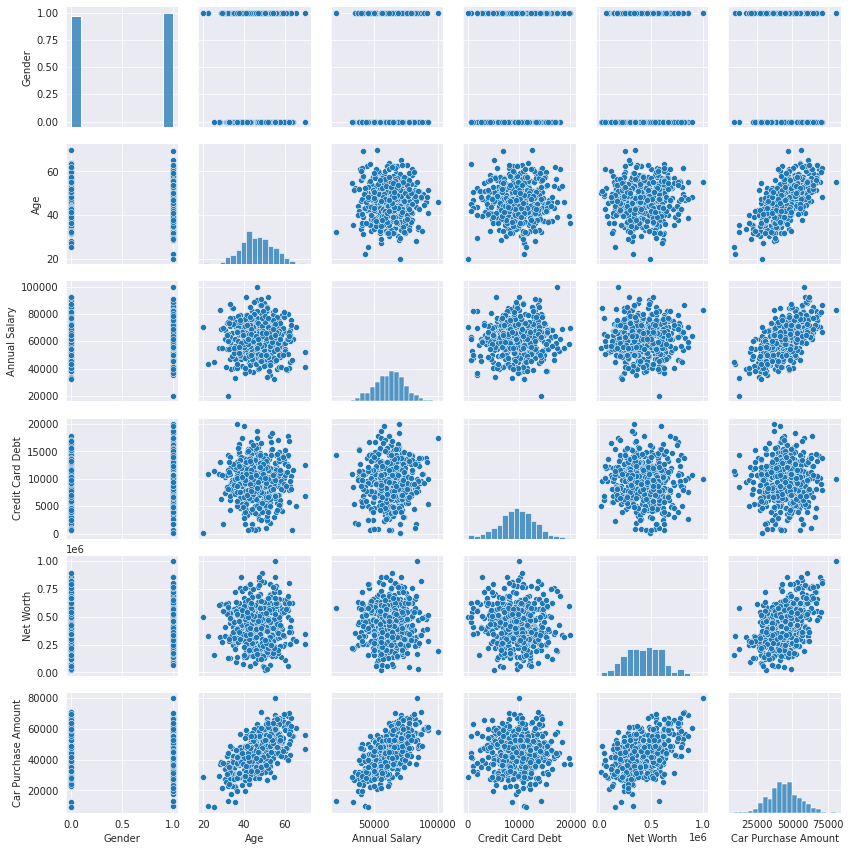

In [6]:
sns.pairplot(car_data, height = 2, aspect = 1)
plt.show()

In [7]:
X = car_data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [8]:
y = car_data['Car Purchase Amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [9]:
X.shape

(500, 5)

In [10]:
y.shape

(500,)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(500, 5)

In [13]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [14]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [15]:
y = y.values.reshape(-1, 1)

In [16]:
y_scaled = scaler.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

In [19]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(units = 500, input_dim = 5, activation = 'relu'))

In [21]:
model.add(Dense(units = 500, activation = 'relu'))

In [22]:
model.add(Dense(units = 1, activation = 'linear'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3000      
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 254,001
Trainable params: 254,001
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [25]:
results = model.fit(X_train, 
                           y_train, 
                           epochs = 25, 
                           batch_size = 50, 
                           verbose = 1,
                           validation_split = 0.2)

Epoch 1/25
7/7 [==============================] - 3s 26ms/step - loss: 0.0929 - val_loss: 0.0120
Epoch 2/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0168 - val_loss: 0.0154
Epoch 3/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 4/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 5/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 6/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 7/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 8/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 7.1213e-04
Epoch 9/25
7/7 [==============================] - 0s 10ms/step - loss: 8.9166e-04 - val_loss: 6.7043e-04
Epoch 10/25
7/7 [==============================] - 0s 7ms/step - loss: 7.6995e-04 - val_loss: 6.1122e-04
Epoch 11/25
7/7 [

In [26]:
results.history.keys()

dict_keys(['loss', 'val_loss'])

In [27]:
loss = results.history['loss']
valid_loss = results.history['val_loss']

In [28]:
epochs = range(1, len(loss) + 1)
print(epochs)

range(1, 26)


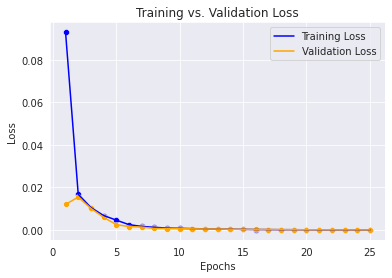

In [29]:
sns.scatterplot(x = epochs, y = loss, color = 'blue')
sns.scatterplot(x = epochs, y = valid_loss, color = 'orange')

sns.lineplot(x = epochs, y = loss, color = 'blue', label = 'Training Loss')
sns.lineplot(x = epochs, y = valid_loss, color = 'orange', label = "Validation Loss")

plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [30]:
y_predict = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [31]:
np.set_printoptions(precision = 2, suppress = True)

In [32]:
y_predict = scaler.inverse_transform(y_predict)
y_test = scaler.inverse_transform(y_test)

In [33]:
differences = y_test - y_predict

In [34]:
percent_diff = (differences / y_test) * 100

In [35]:
comparison = np.concatenate((y_predict, y_test, differences, percent_diff), 1)

In [36]:
comparison

array([[42743.34, 42990.29,   246.96,     0.57],
       [35802.23, 35823.55,    21.32,     0.06],
       [49387.43, 49248.11,  -139.33,    -0.28],
       [42258.23, 42356.69,    98.46,     0.23],
       [49041.82, 49510.03,   468.22,     0.95],
       [39125.23, 39083.94,   -41.28,    -0.11],
       [40337.96, 39892.93,  -445.03,    -1.12],
       [42933.83, 42909.27,   -24.56,    -0.06],
       [44107.86, 44434.98,   327.13,     0.74],
       [56897.35, 56579.9 ,  -317.44,    -0.56],
       [50197.21, 50937.94,   740.73,     1.45],
       [37486.13, 37376.63,  -109.5 ,    -0.29],
       [60112.63, 63248.76,  3136.13,     4.96],
       [46164.17, 46188.84,    24.67,     0.05],
       [48066.05, 47979.49,   -86.56,    -0.18],
       [48432.65, 48465.27,    32.62,     0.07],
       [28289.64, 28440.81,   151.17,     0.53],
       [50609.07, 50666.88,    57.81,     0.11],
       [30561.58, 30964.08,   402.5 ,     1.3 ],
       [51751.76, 51922.08,   170.32,     0.33],
       [38800.98, 38

In [37]:
avg_diff = np.mean(differences)
print("Average Difference: {}($)".format(round(avg_diff, 2)))

Average Difference: 48.6($)


In [38]:
avg_diff_percent = np.mean(percent_diff)
print("Average Difference Percent: {}%".format(round(avg_diff_percent, 2)))

Average Difference Percent: 0.05%


In [39]:
total_accuracy = 100 - np.abs(avg_diff_percent)
print("Total Accuracy: {}%".format(round(total_accuracy, 2)))

Total Accuracy: 99.95%
